In [2]:
import glob
import numpy as np
import cv2

IMG_SIZE = 227

def load_dataset(path):
    X = np.array([])
    y = np.array([])
    classes = ['NORMAL', 'PNEUMONIA']
    for c in classes:
        files = glob.glob(path + c + "/*.jpeg")
        for f in files:
            print(f)
            img = cv2.imread(f) 
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if X.size == 0:
                X = np.array([img])
            else:
                X = np.vstack([X,[img]])
            y = np.append(y, c)

    assert(X.size > 0), 'Cannot read file'
    return (X,y)


In [3]:
X_train, y_train = load_dataset('data/train/')
X_test, y_test = load_dataset('data/test/')
X_val, y_val = load_dataset('data/val/')

data/train/NORMAL\IM-0115-0001.jpeg
data/train/NORMAL\IM-0117-0001.jpeg
data/train/NORMAL\IM-0119-0001.jpeg
data/train/NORMAL\IM-0122-0001.jpeg
data/train/NORMAL\IM-0125-0001.jpeg
data/train/NORMAL\IM-0127-0001.jpeg
data/train/NORMAL\IM-0128-0001.jpeg
data/train/NORMAL\IM-0129-0001.jpeg
data/train/NORMAL\IM-0131-0001.jpeg
data/train/NORMAL\IM-0133-0001.jpeg
data/train/NORMAL\IM-0135-0001.jpeg
data/train/NORMAL\IM-0137-0001.jpeg
data/train/NORMAL\IM-0140-0001.jpeg
data/train/NORMAL\IM-0141-0001.jpeg
data/train/NORMAL\IM-0143-0001.jpeg
data/train/NORMAL\IM-0145-0001.jpeg
data/train/NORMAL\IM-0147-0001.jpeg
data/train/NORMAL\IM-0149-0001.jpeg
data/train/NORMAL\IM-0151-0001.jpeg
data/train/NORMAL\IM-0152-0001.jpeg
data/train/NORMAL\IM-0154-0001.jpeg
data/train/NORMAL\IM-0156-0001.jpeg
data/train/NORMAL\IM-0158-0001.jpeg
data/train/NORMAL\IM-0160-0001.jpeg
data/train/NORMAL\IM-0162-0001.jpeg
data/train/NORMAL\IM-0164-0001.jpeg
data/train/NORMAL\IM-0166-0001.jpeg
data/train/NORMAL\IM-0168-00

## Bài 1: Hãy đọc dữ liệu, và cho biết các thông tin sau:
a) Mục tiêu / tác vụ mà bộ dữ liệu hướng tới là gì? 

Mục tiêu của bộ dữ liệu là giúp phân loại hình ảnh chụp X-quang phổi của người bình thường và người bị viêm phổi, từ đó giúp các nhân viên y tế dễ dàng có thể nhanh chóng sàng lọc được bệnh nhân hơn. 

b) Kích thước của dữ liệu là bao nhiêu trên các tập train, dev và test?

In [5]:
print('Kích thước của tâp train:', y_train.shape[0])

Kích thước của tâp train: 5216


In [6]:
print('Kích thước của tâp val:', y_val.shape[0])

Kích thước của tâp val: 16


In [7]:
print('Kích thước của tâp test:', y_test.shape[0])

Kích thước của tâp test: 624


c) Phân bố nhãn theo từng tác vụ trên các tập train, dev và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên từng tập dữ liệu.

Gợi ý: Sử dụng hàm barplot() trong thư viện seaborn.



In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

train_count = np.unique(y_train, return_counts=True)
train_count = pd.DataFrame(train_count, index=['class', 'count']).T
train_count['set'] = 'train'

val_count = np.unique(y_val, return_counts=True)
val_count = pd.DataFrame(val_count, index=['class', 'count']).T
val_count['set'] = 'val'

test_count = np.unique(y_test, return_counts=True)
test_count = pd.DataFrame(test_count, index=['class', 'count']).T
test_count['set'] = 'test'

count = pd.concat([train_count, val_count, test_count], axis=0)
count

,class,count,set
0,NORMAL,1341,train
1,PNEUMONIA,3875,train
0,NORMAL,8,val
1,PNEUMONIA,8,val
0,NORMAL,234,test
1,PNEUMONIA,390,test


<Axes: xlabel='set', ylabel='count'>

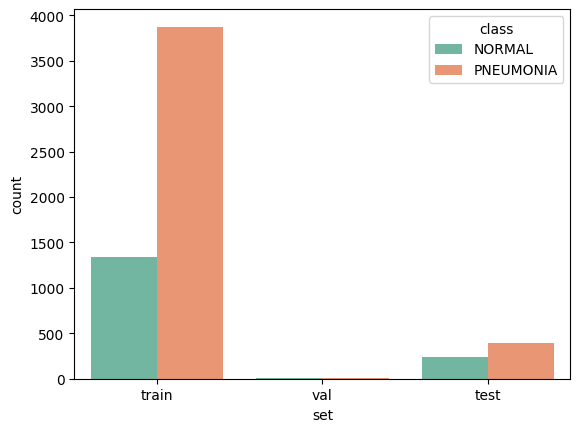

In [9]:
sns.barplot(x='set', y='count', hue='class', data=count, palette='Set2')

d) Hãy hiển thị khoảng 3 bức hình về ảnh X-Quang phổi lên màn hình.

Gợi ý: dùng hàm imshow() trong thư viện matplotlib.

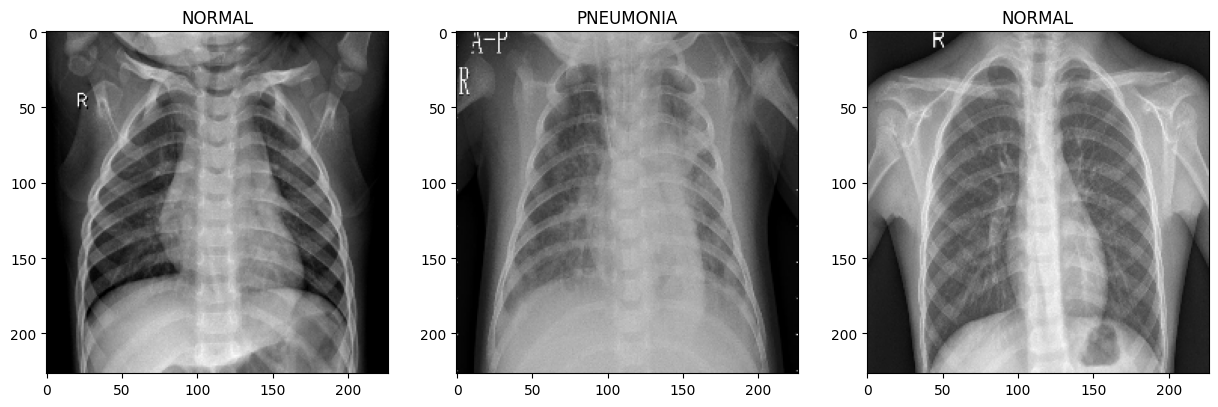

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X_train[1])
ax[0].set_title(y_train[1])
ax[1].imshow(X_val[8])
ax[1].set_title(y_val[8])
ax[2].imshow(X_test[0])
ax[2].set_title(y_test[0])

plt.show()


## Bài 2, 3, 4: Huấn luyện mô hình bằng phương pháp Logistic Regression và SVM. Nhận xét phương pháp nào chạy tốt hơn. 

### Vectorizer đơn giản bằng flatten

In [25]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split

def load_image_files(container_path, dimension=(150, 150)):
    categories = ['NORMAL', 'PNEUMONIA']
    images = []
    flat_data = []
    target = []

    for category in categories:
        category_path = os.path.join(container_path, category)
        for file in os.listdir(category_path):
            img_path = os.path.join(category_path, file)
            img = Image.open(img_path).convert('L')
            img = img.resize(dimension)
            img_array = np.array(img).flatten()
            img_array = img_array / 255.0
            flat_data.append(img_array)
            images.append(img)
            target.append(category)
    
    flat_data = np.array(flat_data)
    target = np.array(target)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR="Chest X-ray dataset")

# Load data
train_data = load_image_files('data/train/')
val_data = load_image_files('data/val/')
test_data = load_image_files('data/test/')

# Encode labels
label_encoder = LabelEncoder()

train_labels = label_encoder.fit_transform(train_data.target)
val_labels = label_encoder.transform(val_data.target)
test_labels = label_encoder.transform(test_data.target)


In [12]:
test_labels.shape

(624,)

In [26]:
X_train = train_data.data
X_val = val_data.data
X_test = test_data.data

y_train = train_labels
y_val = val_labels
y_test = test_labels


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, train_labels)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(test_labels, y_pred_logreg))
print(classification_report(test_labels, y_pred_logreg, target_names=label_encoder.classes_))

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(test_labels, y_pred_logreg)
cm_logreg

Logistic Regression Accuracy: 0.7403846153846154
              precision    recall  f1-score   support

      NORMAL       0.93      0.33      0.49       234
   PNEUMONIA       0.71      0.98      0.83       390

    accuracy                           0.74       624
   macro avg       0.82      0.66      0.66       624
weighted avg       0.79      0.74      0.70       624



array([[ 78, 156],
       [  6, 384]], dtype=int64)

In [27]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, train_labels)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(test_labels, y_pred_svm))
print(classification_report(test_labels, y_pred_svm, target_names=label_encoder.classes_))

# Confusion matrix for SVM
cm_svm = confusion_matrix(test_labels, y_pred_svm)
cm_svm

SVM Accuracy: 0.75
              precision    recall  f1-score   support

      NORMAL       0.94      0.35      0.52       234
   PNEUMONIA       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



array([[ 83, 151],
       [  5, 385]], dtype=int64)

**Nhận xét**: Đối với phương pháp vectorizer này, nhìn chung thì SVM cho kết quả cao hơn Logistic Regression, tuy nhiên phải đánh đổi bằng thời gian train và dự đoán tương đối lâu hơn. 

### Dùng MobileNetv2 (một pretrain-model đã được train trên ImageNet) để trích xuất đặc trưng từ hình ảnh, sau đó dùng vector đặc trưng đã trích xuất đưa vào 2 mô hình để phân lớp

In [16]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch

def load_image_files(container_path, dimension=(224, 224)):
    categories = ['NORMAL', 'PNEUMONIA']
    images = []
    flat_data = []
    target = []

    for category in categories:
        category_path = os.path.join(container_path, category)
        for file in os.listdir(category_path):
            img_path = os.path.join(category_path, file)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(dimension)
            img_array = np.array(img)
            flat_data.append(img_array)
            images.append(img)
            target.append(category)
    
    flat_data = np.array(flat_data)
    target = np.array(target)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR="Chest X-ray dataset")

# Load data
train_data = load_image_files('data/train/')
val_data = load_image_files('data/val/')
test_data = load_image_files('data/test/')

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data.target)
val_labels = label_encoder.transform(val_data.target)
test_labels = label_encoder.transform(test_data.target)


In [17]:
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

# Load the MobileNetV2 model pre-trained on ImageNet, without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Function to extract features
def extract_features(data, model):
    data_preprocessed = preprocess_input(data)
    features = model.predict(data_preprocessed)
    return features

# Extract features
X_train = extract_features(train_data.data, base_model)
X_val = extract_features(val_data.data, base_model)
X_test = extract_features(test_data.data, base_model)


20/20 [==============================] - 14s 679ms/step


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, train_labels)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(test_labels, y_pred_logreg))
print(classification_report(test_labels, y_pred_logreg, target_names=label_encoder.classes_))

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(test_labels, y_pred_logreg)
cm_logreg

Logistic Regression Accuracy: 0.8125
              precision    recall  f1-score   support

      NORMAL       0.98      0.51      0.67       234
   PNEUMONIA       0.77      0.99      0.87       390

    accuracy                           0.81       624
   macro avg       0.88      0.75      0.77       624
weighted avg       0.85      0.81      0.79       624



array([[119, 115],
       [  2, 388]], dtype=int64)

In [19]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, train_labels)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(test_labels, y_pred_svm))
print(classification_report(test_labels, y_pred_svm, target_names=label_encoder.classes_))

# Confusion matrix for SVM
cm_svm = confusion_matrix(test_labels, y_pred_svm)
cm_svm

SVM Accuracy: 0.8157051282051282
              precision    recall  f1-score   support

      NORMAL       0.98      0.52      0.68       234
   PNEUMONIA       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.76      0.78       624
weighted avg       0.85      0.82      0.80       624



array([[122, 112],
       [  3, 387]], dtype=int64)

**Nhận xét**: MobileNetv2 được sử dụng bên trên là một pre-trained model đã được train trên bộ dữ liệu ImageNet, nó có khả năng trích xuất những thông tin quan trọng trọng hình ảnh từ đó giúp mô hình đưa ra kết quả tốt hơn. Nó sẽ tốn thời gian để tiền xử lý hơn nhưng bù lại thời gian train và predict model nhanh hơn hẳn. 

Sau khi áp dụng, kết quả của cả 2 mô hình đều tăng mạnh so với ban đầu. Kết quả của 2 mô hình lần này xấp xỉ nhau, tuy nhiên về chỉ số f1-score macro thì SVM vẫn cho kết quả tốt hơn một chút. 

Có một nhược điểm chung của 2 phương pháp pre-processing và của cả 2 model đó là kết quả dự đoán quá thiên vị cho lớp `PNEUMONIA`, chỉ số Recall rất cao nhưng Precision thì không quá cao. 

In [29]:
# import joblib

# # Lưu mô hình Logistic Regression vào file
# joblib.dump(svm, 'svm_model.pkl')